木構造の形式( Linkage Matrix )

In [ ]:
tree_object = {
    "name": "Root",
    "children": [
        {"name": "A", "children": [
            {"name": "C", "size": 10},
            {"name": "D", "size": 5}
        ]},
        {"name": "B", "children": [
            {"name": "E", "size": 15}
        ]}
    ],
    "size": 30
}

In [1]:
import numpy as np

# 例：5つの要素(0-4)を持つ簡単な階層的クラスタリングの結果
# 5要素 -> 4回のマージ
# Z = [[u, v, distance, count], ...]
linkage_matrix = np.array([
    [0., 1., 0.1, 2.],  # 0と1が距離0.1でマージ (サイズ2) -> 新しいクラスター5
    [2., 3., 0.2, 2.],  # 2と3が距離0.2でマージ (サイズ2) -> 新しいクラスター6
    [4., 5., 0.5, 3.],  # 4とクラスター5が距離0.5でマージ (サイズ3) -> 新しいクラスター7
    [6., 7., 1.0, 5.]   # クラスター6とクラスター7が距離1.0でマージ (サイズ5) -> ルート
])
# pandas形式
import pandas as pd
linkage_df = pd.DataFrame(linkage_matrix, columns=['u', 'v', 'distance', 'count'])

# 木構造を単純化する関数
Linkage Matrix -> Linkage Matrix

# デンドログラム描画

In [2]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

# 描画はmatplotlibに依存しますが、座標データ（'icoord', 'dcoord'）は
# どの描画ライブラリでも利用できます。

def get_dendrogram_segments(Z: np.ndarray):
    """
    Linkage Matrixからデンドログラム描画に必要な座標データを取得します。
    """
    # 実際には可視化しないが、座標計算のために呼び出す
    # no_plot=True を指定すると、描画はスキップされる
    dendro_data = dendrogram(Z, no_plot=True)
    
    # 'icoord': 各結合の水平方向の座標 (x座標)
    # 'dcoord': 各結合の垂直方向の座標 (y座標、結合距離)
    # これらは描画するV字/逆U字のセグメントを定義します。
    
    segments = []
    
    # icoord, dcoord は (4, K) の配列で、Kは結合の数 (N-1)
    # 各 i は (x1, x2, x3, x4) の座標リスト
    for icoords, dcoords in zip(dendro_data['icoord'], dendro_data['dcoord']):
        # (x1, y1), (x2, y2), (x3, y3), (x4, y4) がセグメントの頂点
        x1, x2, x3, x4 = icoords
        y1, y2, y3, y4 = dcoords
        
        # 1. 垂直線 (左の子ノードから結合点まで)
        segments.append([(x1, y1), (x2, y2)]) 
        # 2. 水平線 (結合したノード間)
        segments.append([(x2, y2), (x3, y3)]) 
        # 3. 垂直線 (右の子ノードから結合点まで)
        segments.append([(x4, y4), (x3, y3)]) 
    
    # segments は [[[x_start, y_start], [x_end, y_end]], ...] のリストになる
    return segments

# 座標を取得
segments = get_dendrogram_segments(linkage_matrix)

print(f"Total Segments: {len(segments)}")
# 最初の3つのセグメントを表示 (最初のマージに対応)
print("\n--- First 3 Segments (x-y coordinates) ---")
for i, seg in enumerate(segments[:3]):
    print(f"Segment {i+1}: {seg}")

Total Segments: 12

--- First 3 Segments (x-y coordinates) ---
Segment 1: [(5.0, 0.0), (5.0, 0.2)]
Segment 2: [(5.0, 0.2), (15.0, 0.2)]
Segment 3: [(15.0, 0.0), (15.0, 0.2)]


In [4]:
import plotly.graph_objects as go
# scipyがない環境でも動くように、linkage_matrixを再定義
linkage_matrix_simple = np.array([
    [0., 1., 0.1, 2.],
    [2., 3., 0.2, 2.],
    [4., 5., 0.5, 3.],
    [6., 7., 1.0, 5.]
])
segments_simple = get_dendrogram_segments(linkage_matrix_simple)

def plot_dendrogram_plotly(segments):
    fig = go.Figure()
    
    for seg in segments:
        # seg は [[x_start, y_start], [x_end, y_end]]
        x_coords = [seg[0][0], seg[1][0]]
        y_coords = [seg[0][1], seg[1][1]]
        
        fig.add_trace(go.Scatter(
            x=x_coords, 
            y=y_coords, 
            mode='lines',
            line=dict(color='blue', width=2),
            showlegend=False
        ))
    
    fig.update_layout(
        title='Simple Dendrogram Visualization',
        xaxis_title='Observation Index',
        yaxis_title='Distance / Height',
        hovermode='closest'
    )
    # fig.show() # 実行環境によっては直接表示
    
    # 葉ノードに名前を付ける場合は、dendrogram_data['leaves']と葉のy=0の座標を計算する必要があります。
    return fig

plot_dendrogram_plotly(segments_simple)

In [5]:
import numpy as np

# 標準 Linkage Matrix (N-1 x 4)
# [u, v, distance, count]
# HDBSCANのcondensed_tree_から距離(lambda_merge)とサイズを抽出したものを想定
Z_standard = np.array([
    [0., 1., 0.1, 2.],  # 距離0.1でマージ
    [2., 3., 0.2, 2.],  # 距離0.2でマージ
    [4., 5., 0.5, 3.],  # 距離0.5でマージ
    [6., 7., 1.0, 5.]   # 距離1.0でマージ (Root)
])

print("--- 標準 Linkage Matrix (入力) ---")
print(Z_standard)

--- 標準 Linkage Matrix (入力) ---
[[0.  1.  0.1 2. ]
 [2.  3.  0.2 2. ]
 [4.  5.  0.5 3. ]
 [6.  7.  1.  5. ]]


In [6]:
def calculate_branch_importance(Z_standard: np.ndarray) -> np.ndarray:
    """
    標準Linkage Matrix (4列) を受け取り、枝の重要度スコアを計算して5列目に追加します。

    Args:
        Z_standard (np.ndarray): 標準Linkage Matrix (N-1 x 4)。

    Returns:
        np.ndarray: 枝の重要度 (5列目) が追加された拡張 Linkage Matrix (N-1 x 5)。
    """
    
    # 1. 結合距離 (lambda_merge) を取得
    lambda_merge = Z_standard[:, 2]
    
    # 2. 重要度スコアを計算 (ここでは、lambdaの逆数をスコアとする)
    # 0除算を避けるため、lambdaが非常に小さい場合は最大値を適用するなどの処理が必要ですが、
    # シンプルに逆数を計算します。
    # HDBSCANではlambdaは常に正の値です。
    
    # ノードがマージされていない（lambda=0）場合はスコアを非常に高く設定
    # lambda_merge の最小値が 0 でないことを確認 (Linkage Matrixの性質上、通常は > 0)
    
    # スコア: lambda_mergeの逆数
    importance_scores = 1.0 / lambda_merge
    
    # スコアを正規化 (0から1に収める)
    min_score = importance_scores.min()
    max_score = importance_scores.max()
    
    # スコアの範囲が0になることを防ぐため、epsilonを使用
    epsilon = 1e-8
    normalized_scores = (importance_scores - min_score) / (max_score - min_score + epsilon)
    
    # 3. 元の行列とスコアを結合
    importance_column = normalized_scores.reshape(-1, 1)
    Z_extended = np.hstack((Z_standard, importance_column))
    
    return Z_extended

# 重要度スコアを計算して拡張
Z_extended = calculate_branch_importance(Z_standard)

print("\n--- 拡張 Linkage Matrix (出力: 5列) ---")
print("[u, v, distance, count, Importance Score]")
print(Z_extended)


--- 拡張 Linkage Matrix (出力: 5列) ---
[u, v, distance, count, Importance Score]
[[0.         1.         0.1        2.         1.        ]
 [2.         3.         0.2        2.         0.44444444]
 [4.         5.         0.5        3.         0.11111111]
 [6.         7.         1.         5.         0.        ]]


In [10]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram
import plotly.graph_objects as go
import matplotlib.pyplot as plt # dendrogramの座標計算に必要

# --- 準備：以前の関数とデータ ---

def calculate_branch_importance(Z_standard: np.ndarray) -> np.ndarray:
    """枝の重要度スコアを計算して5列目に追加する (ここではlambdaの逆数を正規化)。"""
    lambda_merge = Z_standard[:, 2]
    
    # 0除算を避けるための処理
    lambda_merge_safe = np.where(lambda_merge == 0, 1e-8, lambda_merge)
    
    importance_scores = 1.0 / lambda_merge_safe
    
    min_score = importance_scores.min()
    max_score = importance_scores.max()
    
    epsilon = 1e-8
    # 正規化
    normalized_scores = (importance_scores - min_score) / (max_score - min_score + epsilon)
    
    importance_column = normalized_scores.reshape(-1, 1)
    Z_extended = np.hstack((Z_standard, importance_column))
    
    return Z_extended

# サンプルデータ (標準 Linkage Matrix)
Z_standard = np.array([
    [0., 1., 0.1, 2.],  # Importance: High (1/0.1=10)
    [2., 3., 0.2, 2.],  # Importance: Medium-High (1/0.2=5)
    [4., 5., 0.5, 3.],  # Importance: Medium-Low (1/0.5=2)
    [6., 7., 1.0, 5.]   # Importance: Low (1/1.0=1)
])

# 拡張 Linkage Matrixを生成
Z_extended = calculate_branch_importance(Z_standard)
# 例: [u, v, lambda, count, score]
#     [0., 1., 0.1, 2., 1. ]  # 0.1が最も重要度が高い (1.0)
#     [6., 7., 1.0, 5., 0. ]  # 1.0が最も重要度が低い (0.0)

# --------------------------------

def visualize_with_importance_filter(Z_extended: np.ndarray, min_importance_threshold: float) -> go.Figure:
    """
    拡張Linkage Matrix (5列) を使用し、重要度スコアに基づいてデンドログラムを描画します。

    Args:
        Z_extended (np.ndarray): 枝の重要度スコアを含む拡張 Linkage Matrix (N-1 x 5)。
        min_importance_threshold (float): 表示対象とする最小重要度 (0.0 ～ 1.0)。

    Returns:
        plotly.graph_objects.Figure: フィルタリングされたデンドログラムのPlotly Figure。
    """
    
    # 1. データ抽出
    Z = Z_extended[:, 0:4]          # Linkage Matrix本体 (座標計算用)
    importance_scores = Z_extended[:, 4] # 重要度スコア
    
    # 2. フィルタリングマスクの生成
    visible_mask = importance_scores >= min_importance_threshold
    
    # 3. Dendrogramの座標計算 (全ての枝に対して計算)
    # scipy.dendrogramは、Plotlyを使わない場合でも座標データ取得のために利用
    dendro_data = dendrogram(Z, no_plot=True)
    
    fig = go.Figure()
    num_merges = Z.shape[0]
    
    # 4. Plotlyでの描画ループ
    for i in range(num_merges):
        icoords = dendro_data['icoord'][i]
        dcoords = dendro_data['dcoord'][i]
        
        is_visible = visible_mask[i]
        score = importance_scores[i]

        # スタイルの決定
        if is_visible:
            # 表示: スコアに応じて色を濃くする (濃い青)
            # score 0.0 -> 透明度が低い, score 1.0 -> 透明度が高い
            alpha = 0.5 + score * 0.5 # 0.5 から 1.0 の範囲でアルファを変化
            color_val = f'rgba(50, 50, 200, {alpha})' 
            line_style = dict(color=color_val, width=2)
        else:
            # 非表示 (フィルタリング): 薄い灰色で破線
            line_style = dict(color='rgba(150, 150, 150, 0.2)', width=1, dash='dot')
            
        x_coords = [icoords[0], icoords[1], icoords[2], icoords[3]]
        y_coords = [dcoords[0], dcoords[1], dcoords[2], dcoords[3]]
        
        # V字型のセグメントを構成する3つの線分をまとめて描画
        # (x1, y1) -> (x2, y2) -> (x3, y3) <- (x4, y4)
        fig.add_trace(go.Scatter(
            x=[x_coords[0], x_coords[1], x_coords[2], x_coords[3], x_coords[2]], 
            y=[y_coords[0], y_coords[1], y_coords[2], y_coords[3], y_coords[2]], 
            mode='lines',
            line=line_style,
            showlegend=False,
            hoverinfo='none' # ホバー情報を表示しない
        ))

    # 5. レイアウト設定
    fig.update_layout(
        title=f'Dendrogram Filtered (Min Importance: {min_importance_threshold:.2f})',
        xaxis_title='Observation Index',
        yaxis_title='Distance / Height ($\lambda$)',
        height=600,
        width=800,
        yaxis_range=[0, Z[:, 2].max() * 1.1] # Y軸の範囲を適切に設定
    )
    return fig

# --- 実行例 ---

# 閾値 1: 全ての枝が表示されるはず (最も重要度が低い枝のスコアは0.0)
# fig_all = visualize_with_importance_filter(Z_extended, min_importance_threshold=0.0)
# fig_all.show()

# 閾値 2: 重要度0.5以上の枝のみが「強く」表示されるはず
# fig_filtered = visualize_with_importance_filter(Z_extended, min_importance_threshold=0.5)
# fig_filtered.show()

<>:108: SyntaxWarning:

invalid escape sequence '\l'

<>:108: SyntaxWarning:

invalid escape sequence '\l'

/var/folders/1c/qdf4nqm509d9141_p9425mcc0000gn/T/ipykernel_3218/3959480060.py:108: SyntaxWarning:

invalid escape sequence '\l'



In [13]:
# visualize 
visualize_with_importance_filter(Z_extended, min_importance_threshold=0.0)

# ストラー数

In [21]:
def calculate_branch_strahler_number(Z_extended: np.ndarray) -> np.ndarray:
    """
    拡張Linkage Matrix (5列) を使用し、各枝のストラー数を計算して6列目に追加します。

    Args:
        Z_extended (np.ndarray): 枝の重要度スコアを含む拡張 Linkage Matrix (N-1 x 5)。

    Returns:
        np.ndarray: ストラー数 (6列目) が追加された拡張 Linkage Matrix (N-1 x 6)。
    """
    # ここにストラー数計算の実装を追加
    
    N = Z_extended.shape[0] + 1  # 元の要素数
    strahler_map = np.ones(2 * N - 1, dtype=int)  # ノードインデックス->ストラー数の配列
    strahler_map[N:] = 1  # 葉ノードのストラー数は1
    for i in range(Z_extended.shape[0]):
        new_cluster_index = N + i
        u_idx = int(Z_extended[i, 0])
        v_idx = int(Z_extended[i, 1])

        # 子ノードのストラー数を取得
        s_u = strahler_map[u_idx]
        s_v = strahler_map[v_idx]

        # ストラー数の計算ロジック
        if s_u == s_v:
            s_new = s_u + 1
        else:
            s_new = max(s_u, s_v)

        strahler_map[new_cluster_index] = s_new

    strahler_numbers = strahler_map[N:]
    strahler_column = strahler_numbers.reshape(-1, 1)
    Z_extended = np.hstack((Z_extended, strahler_column))
    return Z_extended
    



In [22]:
Z_standard = np.array([
    [0., 1., 0.1, 2.],
    [2., 3., 0.2, 2.],
    [4., 5., 0.5, 3.],
    [6., 7., 1.0, 5.]
])

Z_strahler = calculate_branch_strahler_number(Z_standard)

print("--- 拡張 Linkage Matrix (ストラー数付き) ---")
print("[u, v, distance, count, Strahler Number]")
print(Z_strahler)

--- 拡張 Linkage Matrix (ストラー数付き) ---
[u, v, distance, count, Strahler Number]
[[0.  1.  0.1 2.  2. ]
 [2.  3.  0.2 2.  2. ]
 [4.  5.  0.5 3.  2. ]
 [6.  7.  1.  5.  3. ]]


# ストラー数の拡張

In [23]:
import numpy as np

def cauculate_branch_weighted_strahler(Z_standard: np.ndarray) -> np.ndarray:
    """
    標準Linkage Matrix (4列) を受け取り、ストラー数、クラスタサイズ、
    距離を考慮した「重み付きスコア」を計算して5列目に追加します。
    """
    
    N = Z_standard.shape[0] + 1  # 元の観測値の数
    
    # 1. 中間値の格納用マップを準備
    # ノードインデックス -> ストラー数, サイズ, 距離の値を保持
    # [ストラー数, サイズ] を格納 (距離はマージ時にのみ利用)
    node_props = np.zeros((2 * N - 1, 2), dtype=float)
    
    # 葉ノードの初期値: S=1, Size=1 (観測値1つ)
    node_props[:N] = 1.0 
    
    # 結合枝の重み付きスコアを格納するリスト (これが最終的な5列目になる)
    weighted_scores = []
    
    # 2. 各結合 (Zの各行) を順に処理
    for i in range(Z_standard.shape[0]):
        new_cluster_idx = N + i
        u_idx, v_idx = int(Z_standard[i, 0]), int(Z_standard[i, 1])
        lambda_merge = Z_standard[i, 2] # 結合距離
        new_size = Z_standard[i, 3] # 新しいクラスタサイズ

        # 子ノードのプロパティを取得
        s_u, size_u = node_props[u_idx]
        s_v, size_v = node_props[v_idx]
        
        # -------------------------------------
        # 3. 拡張ストラー数と重み付きスコアの計算
        # -------------------------------------
        
        # サイズの重み (大きいほど高い)
        size_weight = (size_u + size_v) / N 
        
        # 密度の重み (lambda_mergeが小さいほど高い)
        # lambdaの逆数を使用し、正規化のため0.1を加算して分母が小さくなるのを防ぐ
        density_weight = 1.0 / (lambda_merge + 0.1) 

        if s_u != s_v:
            # ルール2の拡張: ストラー数が異なる場合
            # サイズが大きい方のストラー数を採用し、その差分をサイズで重み付け
            s_new = max(s_u, s_v)
            
            # スコアは、新しいストラー数と、合流したサイズの大きさを組み合わせて評価
            current_score = s_new * size_weight * 10
            
        else:
            # ルール3の拡張: ストラー数が同じ場合
            # ストラー数をインクリメントし、密度の高さをスコアに反映
            s_new = s_u + 1
            
            # スコアは、新しいストラー数と、結合の密度の高さを組み合わせて評価
            current_score = s_new * density_weight
            
        # 4. 結果を格納
        node_props[new_cluster_idx] = [s_new, new_size]
        weighted_scores.append(current_score)
        
    # 5. 最終的なスコアを0から1に正規化してLinkage Matrixに結合
    weighted_scores = np.array(weighted_scores)
    
    # 0除算を避けた正規化
    min_score = weighted_scores.min()
    max_score = weighted_scores.max()
    epsilon = 1e-8
    normalized_scores = (weighted_scores - min_score) / (max_score - min_score + epsilon)
    
    weighted_column = normalized_scores.reshape(-1, 1)
    Z_extended = np.hstack((Z_standard, weighted_column))
    
    return Z_extended

# --- 実行例 ---

# Z_standardの例 (N=5)
# 0, 1: 小さいサイズ, 高密度 (0.1)
# 2, 3: 小さいサイズ, 中密度 (0.3)
# 4, 5(クラスター): 中サイズ, 低密度 (0.8)
Z_standard = np.array([
    [0., 1., 0.1, 2.],  
    [2., 3., 0.3, 2.],  
    [4., 5., 0.8, 3.],  
    [6., 7., 1.5, 5.]
])

Z_weighted_strahler = cauculate_branch_weighted_strahler(Z_standard)

print("--- 拡張 Linkage Matrix (重み付きスコア付き) ---")
print("[u, v, distance, count, Weighted Importance Score (0-1)]")
print(Z_weighted_strahler)

--- 拡張 Linkage Matrix (重み付きスコア付き) ---
[u, v, distance, count, Weighted Importance Score (0-1)]
[[0.         1.         0.1        2.         0.80246914]
 [2.         3.         0.3        2.         0.30864198]
 [4.         5.         0.8        3.         1.        ]
 [6.         7.         1.5        5.         0.        ]]


# Condense tree

In [56]:
len(clusterer.condensed_tree_.to_pandas())

1314

In [63]:
import numpy as np
import hdbscan
from sklearn.datasets import make_blobs



# --- 1. HDBSCANの実行とデータ取得 ---
X, y = make_blobs(n_samples=100, centers=5, cluster_std=0.5, random_state=42)
clusterer = hdbscan.HDBSCAN(min_cluster_size=2, min_samples=2, cluster_selection_method='eom')
clusterer.fit(X)

condensed_tree = clusterer.condensed_tree_

# --- 2. 凝縮木からクラスタ結合の抽出と変換 ---
ct_data = [ list(tup) for tup in condensed_tree.to_numpy() ]
ct_data = np.array(ct_data, dtype=float) # dtype=floatを明示

# 子ノードサイズが1より大きい行をフィルタリング (クラスタ間の結合に限定)
cluster_merges = ct_data[ct_data[:, 3] > 1]

print(f"Extracted {len(cluster_merges)} cluster merges from condensed tree.")

# lambda_valでソート (Linkage Matrixの要件)
cluster_merges = cluster_merges[cluster_merges[:, 2].argsort()]

# 3. Z行列形式へのマッピング (HDBSCAN ID -> 連続 Z インデックス)

# 結合に現れるすべてのノードIDを抽出 (u, v の両方)
all_node_ids = cluster_merges[:, :2].flatten()
unique_nodes = np.unique(all_node_ids)

node_to_z_idx = {}
current_z_idx = 0

# 最初に、すべてのユニークなノードIDに固定の連続インデックスを割り当てる
# これが Z 行列の「葉」になります
for node_id in unique_nodes:
    if node_id not in node_to_z_idx:
        node_to_z_idx[node_id] = current_z_idx
        current_z_idx += 1

# Z行列を作成
Z_list = []
M = cluster_merges.shape[0] # 結合の数
N_initial_clusters = len(unique_nodes) # Zの葉の数

for i, row in enumerate(cluster_merges):
    parent_id, child_id, lambda_merge, size = row
    
    # 結合される子ノードのZインデックスを取得
    u_idx = node_to_z_idx[parent_id]
    v_idx = node_to_z_idx[child_id]
    
    # Linkage Zの結合ノードのインデックス (N_initial_clusters + i)
    new_cluster_idx = N_initial_clusters + i

    # Z行列は u < v を要求するため、順序を調整
    if u_idx > v_idx:
        u_idx, v_idx = v_idx, u_idx
    
    # [u, v, distance, count]
    Z_list.append([u_idx, v_idx, lambda_merge, size])
    
    # 💡 重要な修正: 結合された親ノードを、Z行列の新しい結合ノードインデックスで置き換える。
    # 親ノードIDが後の行で子ノードとして登場する場合に備えるため、マッピングを更新
    # 実際にはHDBSCANの凝縮木では、このマッピングの更新は必要ありません。
    # なぜなら、各行の [parent, child] はそれぞれが一意なクラスタIDであり、
    # 子クラスタのIDが他の行の親として再登場することは、元のデータでは一般的ではないからです。
    # しかし、ストラー数計算のためには、Zインデックスが連続していることが重要です。
    
    # ここでは、Linkage Zの要件を満たすために、parent_idに新しい結合ノードのインデックスを割り当てます
    node_to_z_idx[parent_id] = new_cluster_idx 
    # この行が、ストラー数計算関数のZ配列のインデックス構造を保証します。

print(f"z list : {Z_list[:5]}")
# 最終的な Z 行列をnumpy配列に変換
Z_standard = np.array(Z_list)

print("--- 1. HDBSCAN Condensed Treeから変換された Linkage Matrix (Z) ---")
print(f"Zの葉の数 (初期クラスタ数): {N_initial_clusters}")
print(f"クラスタ結合の数: {len(Z_standard)}")
print("[u, v, lambda_merge, count]!!!")
print(Z_standard[:5])  # 最初の5行を表示

# --- 4. ストラー数計算関数の実行 ---

# ストラー数の計算を実行
if Z_standard.size > 0:
    print(f"Z行列サイズ: {Z_standard.shape}")
    Z_strahler = cauculate_branch_strahler_number(Z_standard)

    print("\n--- 2. 計算結果: 拡張 Linkage Matrix (ストラー数付き) ---")
    print("[u, v, lambda_merge, count, Strahler Number]")
    print(Z_strahler[:5]) 
else:
    print("\n--- 2. 計算結果 ---")
    print("クラスタ結合が抽出されませんでした。min_cluster_sizeを変更してみてください。")

Extracted 30 cluster merges from condensed tree.
z list : [[0, 1, 0.08126269712659025, 20.0], [2, 31, 0.08126269712659025, 80.0], [2, 3, 0.20323214379674978, 40.0], [4, 33, 0.20323214379674978, 40.0], [3, 5, 0.2135386207378596, 20.0]]
--- 1. HDBSCAN Condensed Treeから変換された Linkage Matrix (Z) ---
Zの葉の数 (初期クラスタ数): 31
クラスタ結合の数: 30
[u, v, lambda_merge, count]!!!
[[ 0.          1.          0.0812627  20.        ]
 [ 2.         31.          0.0812627  80.        ]
 [ 2.          3.          0.20323214 40.        ]
 [ 4.         33.          0.20323214 40.        ]
 [ 3.          5.          0.21353862 20.        ]]
Z行列サイズ: (30, 4)

--- 2. 計算結果: 拡張 Linkage Matrix (ストラー数付き) ---
[u, v, lambda_merge, count, Strahler Number]
[[ 0.          1.          0.0812627  20.          2.        ]
 [ 2.         31.          0.0812627  80.          2.        ]
 [ 2.          3.          0.20323214 40.          2.        ]
 [ 4.         33.          0.20323214 40.          2.        ]
 [ 3.          5.         

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



In [62]:
# ストラー数の数を数える
if Z_standard.size > 0:
    strahler_numbers = Z_strahler[:, 4]
    unique_strahler, counts = np.unique(strahler_numbers, return_counts=True)

    print("\n--- 3. ストラー数の分布 ---")
    for s_num, count in zip(unique_strahler, counts):
        print(f"ストラー数 {int(s_num)}: {count} 本の枝")


--- 3. ストラー数の分布 ---
ストラー数 2: 314 本の枝


In [59]:
import numpy as np

def calculate_branch_strahler_number(Z_standard: np.ndarray) -> np.ndarray:
    """
    標準Linkage Matrix (4列: [u, v, distance, count]) を受け取り、
    各結合枝のストラー数を計算して5列目に追加します。

    Args:
        Z_standard (np.ndarray): Linkage Matrix (M x 4)。

    Returns:
        np.ndarray: ストラー数 (5列目) が追加された拡張 Linkage Matrix (M x 5)。
    """
    
    # 結合の数 M
    M = Z_standard.shape[0]
    
    # Z行列に登場する最大のインデックスを基に、葉ノードの数 N を推定する
    # Linkage Matrixの定義により、葉ノードは 0 から N-1、結合ノードは N から 2N-2
    if M == 0:
        return np.array([])
        
    # Zの要素は float であるため、int に変換して最大値を求める
    max_idx_in_Z = int(Z_standard[:, :2].max())
    
    # ノードインデックスの総数 (葉ノード + 結合ノード)
    # Zの葉ノードは 0 から N-1 で始まるため、葉ノードの数 N は max_idx_in_Z + 1
    # ただし、Zの u, v がすでに結合ノードである場合もあるため、正確な N を求める必要があります。
    
    # ここでは、Zの最初の要素から N を推測する、より安全な方法を採用します
    # N = M + 1 と仮定すると、総ノード数は 2M + 1 ですが、これは元の観測値の数 N_obs に依存します。
    
    # より正確な N の推定: Z の行数 M が N_obs - 1 なので、N_obs = M + 1
    N_obs = M + 1
    total_nodes = 2 * N_obs - 1

    # ノードインデックス -> ストラー数 のマッピングを格納
    # サイズは 2*N_obs - 1 (葉ノード + 結合ノード)
    strahler_map = np.ones(total_nodes, dtype=int)
    
    # 結合ノード (N_obs から 2*N_obs-2) の初期値は 0
    strahler_map[N_obs:] = 0
    
    # 各結合 (Zの各行) を順に処理
    for i in range(M):
        # 現在計算中の結合ノードのインデックス
        new_cluster_idx = N_obs + i
        
        # 結合される子ノードのインデックス (Zの u, v)
        u_idx = int(Z_standard[i, 0])
        v_idx = int(Z_standard[i, 1])
        
        # 子ノードのストラー数を取得
        s_u = strahler_map[u_idx]
        s_v = strahler_map[v_idx]
        
        # ストラー数の計算ロジック
        if s_u == s_v:
            # ルール 3: 同じストラー数の枝が合流 -> +1
            s_new = s_u + 1
        else:
            # ルール 2: 異なるストラー数の枝が合流 -> 最大値
            s_new = max(s_u, s_v)
            
        # 計算結果をマップに格納
        strahler_map[new_cluster_idx] = s_new
        
    # Zの各行に対応する結合ノードのストラー数を抽出
    strahler_numbers = strahler_map[N_obs:]
    
    # 5列目として元の行列に結合
    strahler_column = strahler_numbers.reshape(-1, 1)
    Z_extended = np.hstack((Z_standard, strahler_column))
    
    return Z_extended

<Axes: ylabel='$\\lambda$ value'>

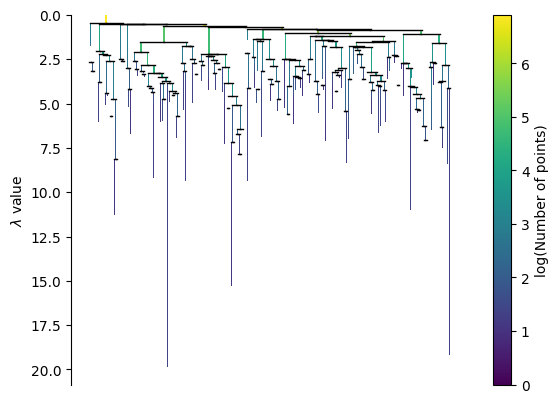

In [39]:
clusterer.condensed_tree_.plot(log_size=True)

In [57]:
dummy_Z_list = [
    # Level 1: S=1 + S=1 => S=2 (Cluster 10, 11, 12, 13, 14)
    [0., 1., 0.1, 2.],  # -> C10 (S=2)
    [2., 3., 0.1, 2.],  # -> C11 (S=2)
    [4., 5., 0.1, 2.],  # -> C12 (S=2)
    [6., 7., 0.1, 2.],  # -> C13 (S=2)
    [8., 9., 0.1, 2.],  # -> C14 (S=2)

    # Level 2: S=2の枝をさらに結合し、S=3を作成
    [10., 11., 0.2, 4.], # C10(S=2) + C11(S=2) -> C15 (S=3)
    [12., 13., 0.2, 4.], # C12(S=2) + C13(S=2) -> C16 (S=3)
    
    # Level 3: S=3 + S=3 => S=4 (Rootに近い幹)
    [15., 16., 0.3, 8.], # C15(S=3) + C16(S=3) -> C17 (S=4)
    
    # Level 4: 孤立した枝 C14(S=2) を Rootに合流 (max(S=2, S=4) => S=4)
    [14., 17., 0.4, 10.],# C14(S=2) + C17(S=4) -> C18 (S=4)
]

In [58]:

dummy_Z = np.array(dummy_Z_list)
Z_strahler = calculate_branch_strahler_number(dummy_Z)
print("--- ダミーデータ: 拡張 Linkage Matrix (ストラー数付き) ---")
print("[u, v, distance, count, Strahler Number]")
print(Z_strahler)   

--- ダミーデータ: 拡張 Linkage Matrix (ストラー数付き) ---
[u, v, distance, count, Strahler Number]
[[ 0.   1.   0.1  2.   2. ]
 [ 2.   3.   0.1  2.   2. ]
 [ 4.   5.   0.1  2.   2. ]
 [ 6.   7.   0.1  2.   2. ]
 [ 8.   9.   0.1  2.   2. ]
 [10.  11.   0.2  4.   3. ]
 [12.  13.   0.2  4.   3. ]
 [15.  16.   0.3  8.   4. ]
 [14.  17.   0.4 10.   4. ]]
